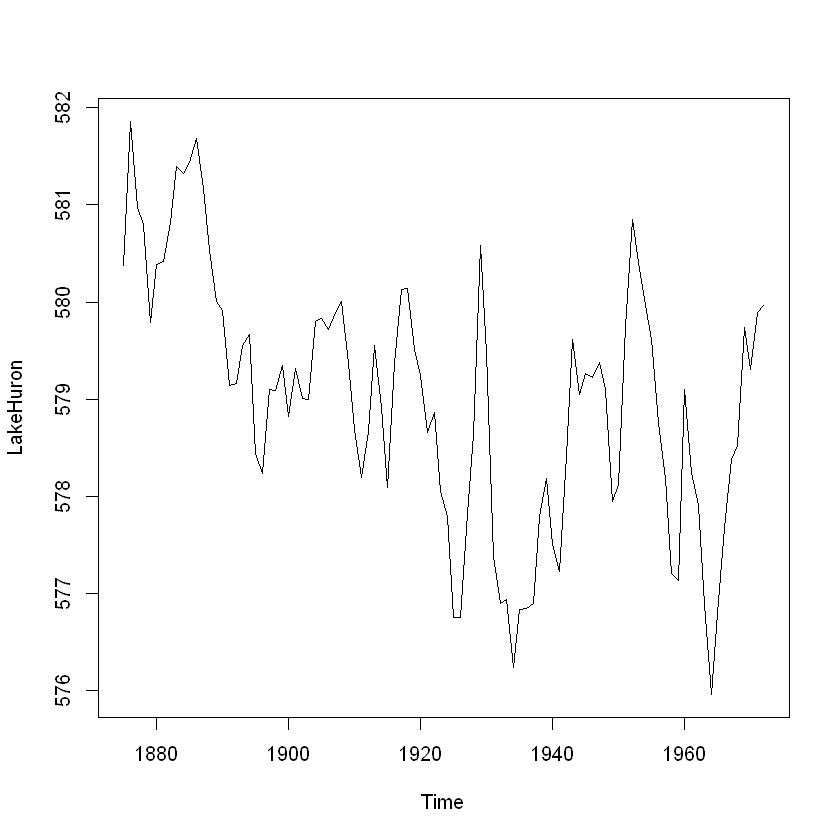

In [3]:
plot(LakeHuron)

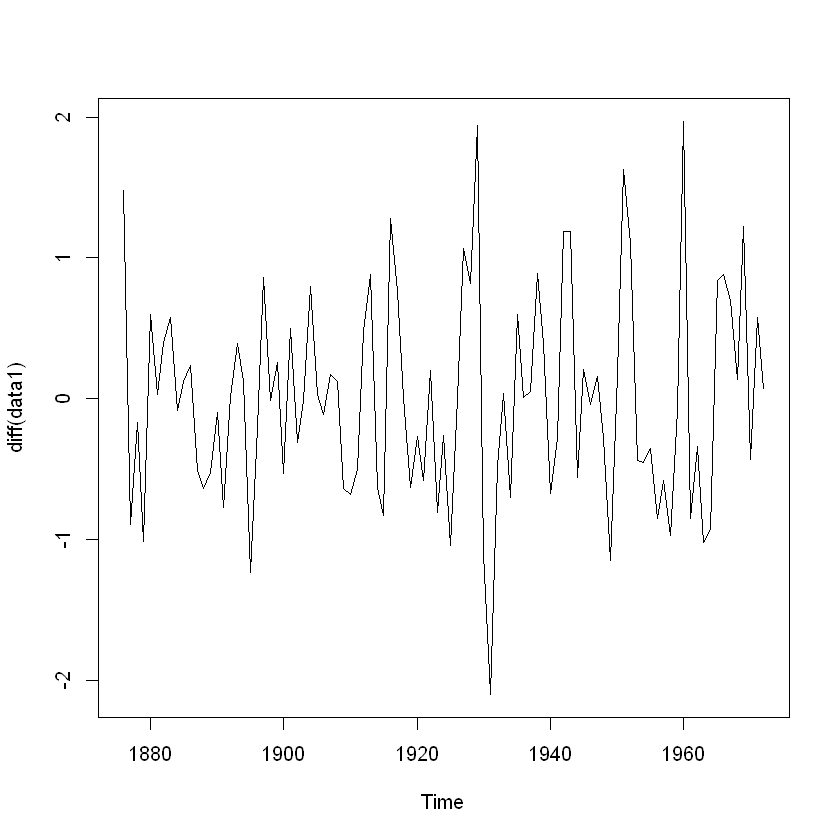

In [5]:
data1<- LakeHuron
plot(diff(data1))
data<-diff(data1)

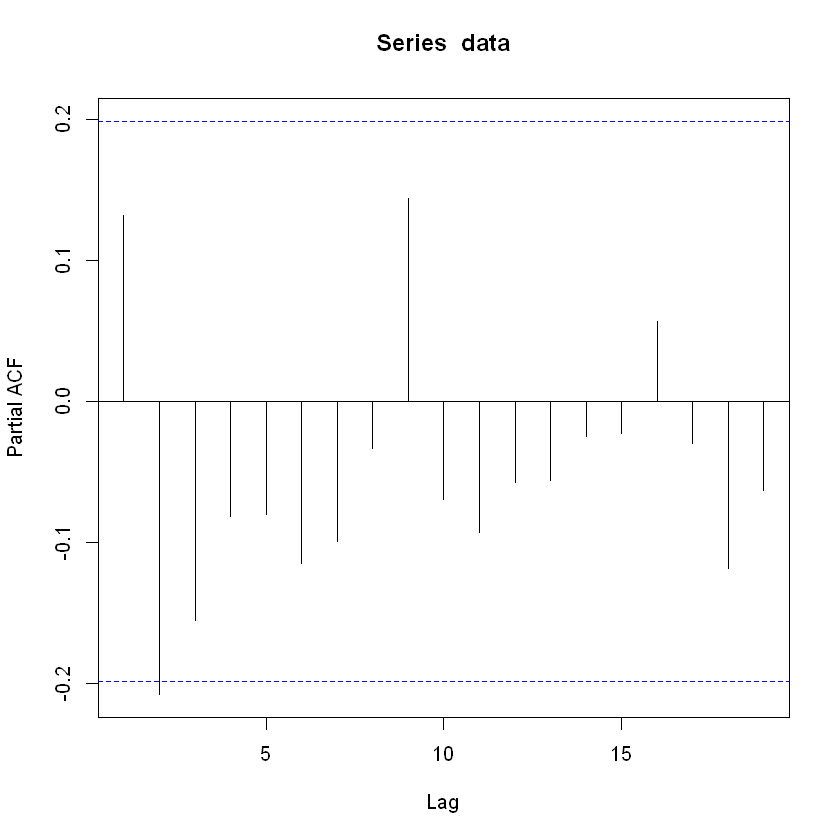

In [6]:
pacf(data)


Autocorrelations of series 'data', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.132 -0.187 -0.203 -0.087 -0.026 -0.053 -0.055  0.017  0.200  0.019 
    11     12     13     14     15     16     17     18     19 
-0.130 -0.112 -0.034  0.036  0.030  0.072  0.008 -0.072 -0.075 

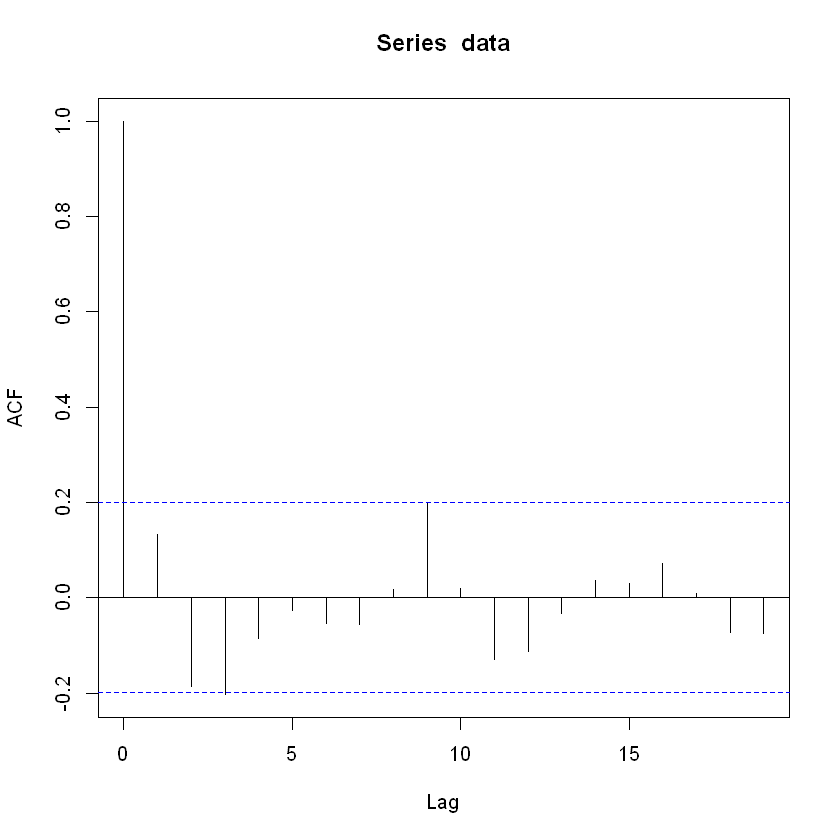

In [8]:
(acf(data))

## Yule walker matrix form

In [10]:
r=NULL
r[1:2]=acf(diff(LakeHuron), plot=F)$acf[2:3]
r


[1]  0.1319241 -0.1870874

In [11]:
R=matrix(1,2,2)
R[1,2]=r[1]
R[2,1]=r[1]
R

1.0000000,0.1319241
0.1319241,1.0000000


In [12]:
b=matrix(r,nrow=2,ncol=1)
b

0.1319241
-0.1870874


## Estimating phi

In [13]:
phi.hat=solve(R,b)
phi.hat

0.1593793
-0.2081134


## Calculating gamma 0

In [16]:
c0=acf(data, type='covariance', plot=F)$acf[1]
c0


[1] 0.5552905

## Estimating variance

In [17]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.5219945

### Let X<sub>t</sub> = LakeHuron and y<sub>t</sub> = diff(LakeHroun)  
X<sub>t</sub> = 1.1594X<sub>t-1</sub> - 0.3675X<sub>t-2</sub> + 0.2081X<sub>t-3</sub> + Z<sub>t</sub>   
where Z<sub>t</sub> ~ Normal (0,0.52)  
  
(1 - 0.1594B + 0.2081B<sup>2</sup> )(1-B)X<sub>t-1</sub> = Z<sub>t</sub>
  
Y<sub>t</sub> = 0.1594Y<sub>t-1</sub> - 0.2081Y<sub>t-2</sub> + Z<sub>t</sub>